# Problem 6.7
### Consider pricing a European call option on an underlying stock with current price S(0) = 50, strike price K = 52, and volatility σ = 0.5. Suppose that there are N = 30 days to maturity and that the risk-free rate of return is r = 0.05.

### (a) Confirm that the fair price for this option is 2.10 when the payoff is based on S(30) [i.e., a standard option with payoff as in (6.74)].

In [1]:
import numpy as np
from scipy.stats import norm

S_0 = 50
K = 52
sigma = 0.5
r = 0.05
T = 30
n = 1000
m = 100

mu_euro = np.zeros((m,1))
for j in range(m):
    S_t = S_0*np.exp(((r-(sigma**2)/2)*(T/365))+(sigma*norm.rvs(size=n)*np.sqrt(T/365)))
    C = np.zeros((n,1))
    for i in range(n):
        C[i] = (np.exp(-r*(T/365))*max(0,S_t[i]-K))
    mu_euro[j] = np.mean(C)
mu_hat = np.mean(mu_euro)

print("Fair Price:",mu_hat)

Fair Price: 2.1000531052177647


### (b) Consider the analogous Asian option (same S(0), K, σ, N, and r) with payoff based on the arithmetic mean stock price during the holding period, as in (6.77). Using simple Monte Carlo, estimate the fair price for this option.

Estimated mu: 0.8710066312337879
Estimated theta: 0.8358998352485149


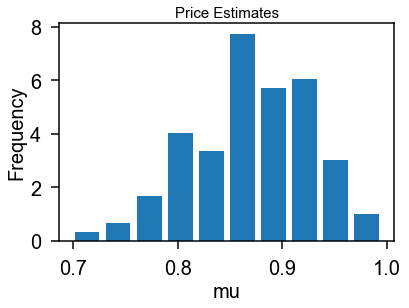

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

mu_monte_carlo = []
theta_monte_carlo = []
for j in range(m):
    A = []
    theta = []
    for i in range(n):
        S_t = [S_0]
        for k in range(1,T):
            S_t.append(S_t[k-1]*np.exp(((r-(sigma**2)/2)/365)+(sigma*norm.rvs(size=1))/np.sqrt(365)))
        A.append(np.exp((-r*T)/365)*max(0,np.mean(S_t)-K))
        theta.append(np.exp(-r*T/365)*max(0,np.exp(np.mean(np.log(S_t))) - K))
    mu_monte_carlo.append(np.mean(A)) # the averaging is the simple monte carlo step
    theta_monte_carlo.append(np.mean(theta))
    
#histogram of mu_monte_carlo
plt.figure()
plt.hist(mu_monte_carlo, density=True,rwidth=0.8)
plt.title("Price Estimates",fontsize=15)
plt.xlabel('mu',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
    
print("Estimated mu:",np.mean(mu_monte_carlo))
print("Estimated theta:",np.mean(theta_monte_carlo))
plt.show()

### (c) Improve upon the estimate in (b) using the control variate strategy described in Example 6.13.

Standard Deviation for Ordinary Approach: 0.05707560269478325
Standard Deviation for Control Variate Approach: 0.002408124827259906


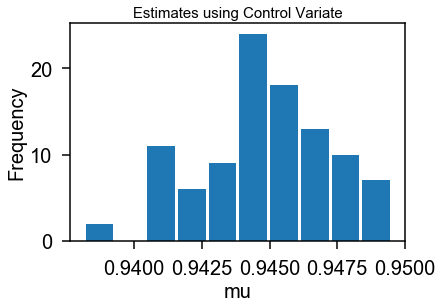

In [3]:
# define constants given in book
S_0 = 50
K = 52
sigma = 0.5
r = 0.05
T = 30
n = 1000
m = 100

c3 = 1 + (1/T)
a = c3*T
b = 1/(2*T)
d = 1 + b
e = (a/1095)*d
g = e**(1/2)
c2 = sigma*g
c1 = (1/c2)*((np.log(S_0/K) + ((c3*T/730)*(r - (sigma**2)/2)) + ((c3*(sigma**2)*T)/1095)*(1 + 1/(2*T))))
the = (S_0*norm.cdf(c1)*np.exp(-T*(r + (c3*(sigma**2)/6))*(1 - (1/T))/730)) - (K*norm.cdf(c1-c2)*np.exp(-r*(T/365)))
    
# calculate control variate
mu_control_var = mu_monte_carlo-(theta_monte_carlo-the)
#histogram mu_control_var
plt.figure()
plt.hist(mu_control_var,rwidth=0.9)
plt.title("Estimates using Control Variate",fontsize=15)
plt.xlabel('mu',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

print("Standard Deviation for Ordinary Approach:",np.std(mu_monte_carlo))
print("Standard Deviation for Control Variate Approach:",np.std(mu_control_var))
plt.show()

### (d) Try an antithetic approach to estimate the fair price for the option described in part (b).